

<center> <h1> <b><span style="color:red"> 
Predictive Analysis <br><br>
Lab 5<br><br>
Understanding Logistic Regression Tables<br></span></b></h1>


## Import the relevant libraries



### information about the dataset: 
Create a logistic regression based on the bank data provided in BB.

The data is based on the marketing campaign efforts of a Portuguese banking institution.The classification goal is to predict if the client will subscribe a term deposit (variable y).
Note that <i> interest rate</i> indicates the 3-month interest rate between banks and <i> duration </i> indicates the time since the last contact was made with a given consumer. The <i> previous </i> variable shows whether the last marketing campaign was successful with this customer. The <i>March</i> and <i> May </i> are Boolean variables that account for when the call was made to the specific customer and <i> credit </i> shows if the customer has enough credit to avoid defaulting. we  use the dependent variable  'duration' to predict 'y'. 

<i> Notes: 
    <li> the first column of the dataset is an index one; </li>
    <li> you don't need the graph for this exercise; </li>
    
</i>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Load the data

Load the ‘Bank_data.csv’ dataset under BB.


#Make sure to create a copy of the data before we start altering it. Note that we don't change the original data we loaded.

#Remove the index column thata comes with the data

#Use the map function to change any 'yes' values to 1 and 'no'values to 0. 

In [6]:
df_origin = pd.read_csv('Bank_data.csv')

# remove index
df = df_origin.drop(['Unnamed: 0'], axis=1)

# convert "y" variables
df['y'] = df['y'].map({'no': 0, 'yes': 1})
df.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


### Declare the dependent and independent variables

Use 'duration' as the independent variable.

In [68]:
x = np.array(df['duration']).reshape(-1, 1)
y = np.array(df['y'])

### Simple Logistic Regression

Run the regression and visualize it on a scatter plot.

Intercept:  [-1.63233799] Coefficient:  [[0.00494578]]
Score:  0.694980694980695
Confusion Matrix: 
[[204  55]
 [103 156]]


(-0.1, 1.1)

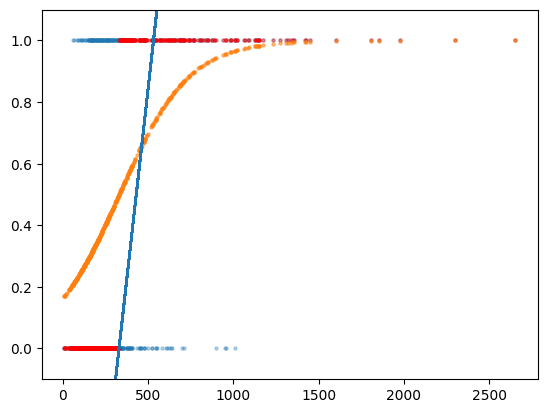

In [101]:
# create the model
model1 = LogisticRegression(solver='liblinear', random_state=0)

# fit the data
model1.fit(x, y)

# check intercept and coefficient
print("Intercept: ", model1.intercept_, "Coefficient: ", model1.coef_)

# get predicted values (probability & binomial)
y_hat_proba = model1.predict_proba(x)
y_hat = model1.predict(x)

# score
print("Score: ", model1.score(x, y))

# confusion matrix
print('Confusion Matrix: ')
print(confusion_matrix(y, y_hat))

# plotting the points & lines
plt.scatter(x, y, s=5, alpha=0.3)
plt.scatter(x, y_hat, color='red', s=5, alpha=0.3)
plt.scatter(x, y_hat_proba[:, 1], s=5, alpha=0.5)
plt.plot(x, x * model1.coef_ + model1.intercept_)
plt.ylim((-0.1, 1.1))

Intercept:  [-1.4384407] Coefficient:  [[0.00447124]]
Score:  0.7046332046332047
Confusion Matrix: 
[[203  56]
 [ 97 162]]


C:\Users\runru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(-0.1, 1.1)

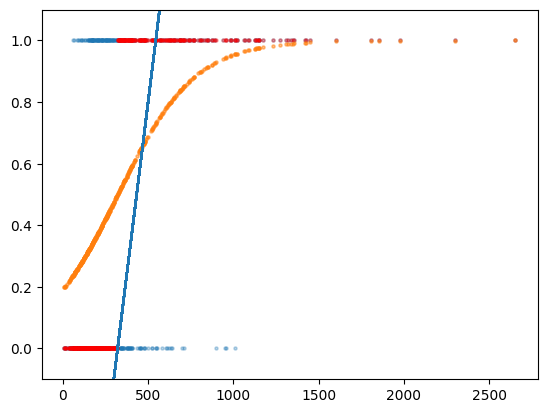

In [107]:
# create the model (smaller iteration)
model2 = LogisticRegression(solver='liblinear', random_state=0, max_iter=10)

# fit the data
model2.fit(x, y)

# check intercept and coefficient
print("Intercept: ", model2.intercept_, "Coefficient: ", model2.coef_)

# get predicted values (probability & binomial)
y_hat_proba = model2.predict_proba(x)
y_hat = model2.predict(x)
# score
print("Score: ", model2.score(x, y))

# confusion matrix
print('Confusion Matrix: ')
print(confusion_matrix(y, y_hat))

# plotting the points
plt.scatter(x, y, s=5, alpha=0.3)
plt.scatter(x, y_hat, color='red', s=5, alpha=0.3)
plt.scatter(x, y_hat_proba[:, 1], s=5, alpha=0.5)
plt.plot(x, x * model2.coef_ + model2.intercept_)
plt.ylim((-0.1, 1.1))

Intercept:  [-0.02689575] Coefficient:  [[0.0014716]]
Score:  0.5115830115830116
Confusion Matrix: 
[[  6 253]
 [  0 259]]


C:\Users\runru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(-0.1, 1.1)

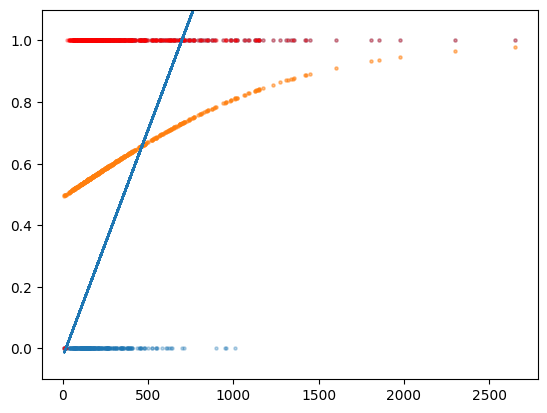

In [108]:
# create the model (more smaller iteration)
model3 = LogisticRegression(solver='liblinear', random_state=0, max_iter=5)

# fit the data
model3.fit(x, y)

# check intercept and coefficient
print("Intercept: ", model3.intercept_, "Coefficient: ", model3.coef_)

# get predicted values (probability & binomial)
y_hat_proba = model3.predict_proba(x)
y_hat = model3.predict(x)

# score
print("Score: ", model3.score(x, y))

# confusion matrix
print('Confusion Matrix: ')
print(confusion_matrix(y, y_hat))

# plotting the points
plt.scatter(x, y, s=5, alpha=0.3, label='Actual')
plt.scatter(x, y_hat, color='red', s=5, alpha=0.3, label='Predicted')
plt.scatter(x, y_hat_proba[:, 1], s=5, alpha=0.5)
plt.plot(x, x * model3.coef_ + model3.intercept_)
plt.ylim((-0.1, 1.1))

### Interpretation
What is the model used, 
What method is used.
what is the value of Pseudo R-squared? What does it mean?
What is the coefficient of the duration variable. what does it mean?

- Model1: Default (solver = 'liblinear', max_iter = 100)
 

- Model2: Smaller Iteration (solver = 'liblinear', max_iter = 10)


- Model2: More Smaller Iteration (solver = 'liblinear', max_iter = 5)